<div style="width:100%"><a href="https://www.dunod.com/sciences-techniques/programmation-python-par-pratique-exercices-et-problemes-corriges"><img src="https://python.guillod.org/livre/banner.png"/></a></div>

Ce fichier reflète les énoncés des exercices d'un chapitre du livre *[Programmation Python par la pratique](https://www.dunod.com/sciences-techniques/programmation-python-par-pratique-exercices-et-problemes-corriges)*. Tous les énoncés peuvent être téléchargés au format [Jupyter Notebook](https://python.guillod.org/livre/) ou exécutés directement en ligne sur [GESIS](https://notebooks.gesis.org/binder/v2/gh/guillod/livre-python/master?urlpath=lab). Les corrigés sont disponibles dans le livre en version papier (ISBN [9782100815142](https://www.dunod.com/sciences-techniques/programmation-python-par-pratique-exercices-et-problemes-corriges)) ou numérique (ISBN [9782100819089](https://www.dunod.com/sciences-techniques/programmation-python-par-pratique-exercices-et-problemes-corriges)) publiés chez Dunod. Ce fichier reflète les exercices tels que publiés dans cet ouvrage et diffère quelque peu des exercices présentés à la page [python.guillod.org](https://python.guillod.org/).

# 9 Zéro de fonctions

<div id="ch:newton"></div>

Le but de cette série d'exercices est de déterminer les zéros de manière approchée d'une fonction notamment par la méthode de Newton. Cela permet en particulier de trouver des solutions approchées d'équations non linéaires. Cette méthode est fondamentale autant d'un point de vue numérique qu'analytique.

**Concepts abordés:**

* méthode de Newton en une et plusieurs dimensions

* matrice jacobienne

* attracteur de la méthode de Newton

* ensemble fractal

* optimisation par parallélisation

* équation différentielle non linéaire

* différences finies



# Exercice 9.1: Méthode de Newton en une dimension

En une dimension, la méthode de Newton consiste à trouver une solution approchée d'une seule équation. Cette équation peut être mise sous la forme générale $F(x)=0$ où $F:\mathbb{R}\to\mathbb{R}$ est une fonction assez régulière, donc le but est de trouver un zéro de la fonction $F$. L'équation $F(x)=0$ est équivalente (si $F^\prime(x) \neq 0$) à l'équation $G(x)=x$ où $G$ est la fonction définie par:

$$
G(x) = x - \frac{F(x)}{F^\prime(x)} \,.
$$

La méthode de Newton consiste à trouver un point fixe de $G$, *i.e.* résoudre $G(x)=x$ par itérations successives:

$$
x_{i+1} = G(x_i) = x_i - \frac{F(x_i)}{F^\prime(x_i)}
$$

à partir d'une valeur initiale $x_0\in\mathbb{R}$.
Lorsque la suite $(x_i)_ {i\in\mathbb{N}}$ converge, alors la limite $x$ est une solution de $G(x)=x$ donc de $F(x)=0$.

**a)**
Écrire une fonction `newton1d(F, DF, x0, eps=1e-10, N=1000)` qui pour une fonction $F$, sa dérivée $F^\prime$ et une valeur initiale $x_0$ données calcule les itérations de Newton jusqu'à ce que  $|F(x_{i})| < \varepsilon$ et retourne $x_{i}$. Si $N$ itérations n'ont pas suffi à atteindre ce critère de convergence, alors retourner une erreur.




**b)**
En utilisant la fonction définie précédemment, trouver une solution approchée de l'équation $e^{-x} = x$.

**Réponse.**
La solution est approximativement donnée par $x=0.56714$.




**c)**
Sans utiliser la fonction `sqrt` ni les puissances fractionnaires, définir une fonction `racine(x,n)` qui calcule $\sqrt[n]{x}$.




Parfois, la dérivée de la fonction $F$ n'étant pas calculable analytiquement, il est alors nécessaire de l'approcher numériquement:

$$
F^\prime(x_i) \approx \frac{F(x_i) - F(x_{i-1})}{x_i-x_{i-1}}
$$

ce qui mène à la méthode de la sécante:

$$
x_{i+1} =  x_i - F(x_i) \frac{x_i-x_{i-1}}{F(x_i) - F(x_{i-1})} = \frac{x_{i-1}F(x_{i})-x_{i}F(x_{i-1})}{F(x_{i})-F(x_{i-1})}
$$

où $x_0$ et $x_1$ doivent être choisis.

**d)**
Écrire une méthode `secant1d(F, x0, x1, eps=1e-10, N=1000)` implémentant la méthode de la sécante et la tester sur l'exemple précédent.



# Exercice 9.2: Méthode de Newton en plusieurs dimensions

<div id="exer:newton-Rn"></div>

La méthode de Newton en une dimension est facilement généralisable à plusieurs dimensions pour résoudre des équations de la forme $F(\boldsymbol{x})=\boldsymbol{0}$ où $F:\mathbb{R}^n \to \mathbb{R}^n$ est une fonction assez régulière. Conceptuellement la méthode est identique: l'équation $F(\boldsymbol{x})=\boldsymbol{0}$ est équivalente à $G(\boldsymbol{x})=\boldsymbol{x}$ avec la fonction $G$ définie par:

$$
G(\boldsymbol{x}) = \boldsymbol{x} - \big(F^\prime(\boldsymbol{x})\big)^{-1} F(\boldsymbol{x})
$$

où $F^\prime(\boldsymbol{x})$ désigne la matrice jacobienne de taille $n \times n$ de $F$ en $x$.
Ainsi les itérations de Newton s'écrivent:

$$
\boldsymbol{x}_{i+1} = \boldsymbol{x}_{i} - \big(F^\prime(\boldsymbol{x}_i)\big)^{-1} F(\boldsymbol{x}_i)
$$

**a)**
Écrire une fonction `newton(F, DF, x0, eps=1e-12, N=10000)` implémentant la méthode de Newton en plus d'une dimension.

**Indication.**
Faire attention que les listes et les tableaux sont mutables. Pour avoir une performance optimale, il ne faut pas inverser la matrice jacobienne mais résoudre un système linéaire avec $F(\boldsymbol{x}_i)$ comme second membre.




**b)**
Utiliser la fonction précédente pour résoudre le système suivant:

$$
\begin{align*}
\cos(x) & =\sin(y)\,, & e^{-x} & =\cos(y)\,.
\end{align*}
$$


**Réponse.**
Une solution est approximativement donnée par $x=0.58853$ et $y=0.98226$.



# Exercice 9.3: Attracteur de la méthode de Newton

Le but de cet exercice est de résoudre l'équation $z^3 = 1$ dans le plan complexe à l'aide de la méthode de Newton et d’analyser vers laquelle des trois racines de l'unité la méthode va converger suivant le choix du point initial $z_0$.

**a)**
Si nécessaire adapter la fonction `newton1d` pour que celle-ci s'applique également aux nombres complexes et la tester pour résoudre $z^3 = 1$ à partir de différentes valeurs de $z_0$.




**b)**
Déterminer pour chaque $z_0 \in \big\{x_0+iy_0: x_0\in[-3,3] \; \text{et} \; y_0\in[-3,3]\big\}$ vers quelle racine de l'unité la méthode de Newton va converger. Représenter graphiquement cet ensemble comme sur la figure suivante.

**Indication.**
La fonction `meshgrid` de Numpy peut être utile pour construire la matrice correspondant à l'ensemble des $z_0$.

<center>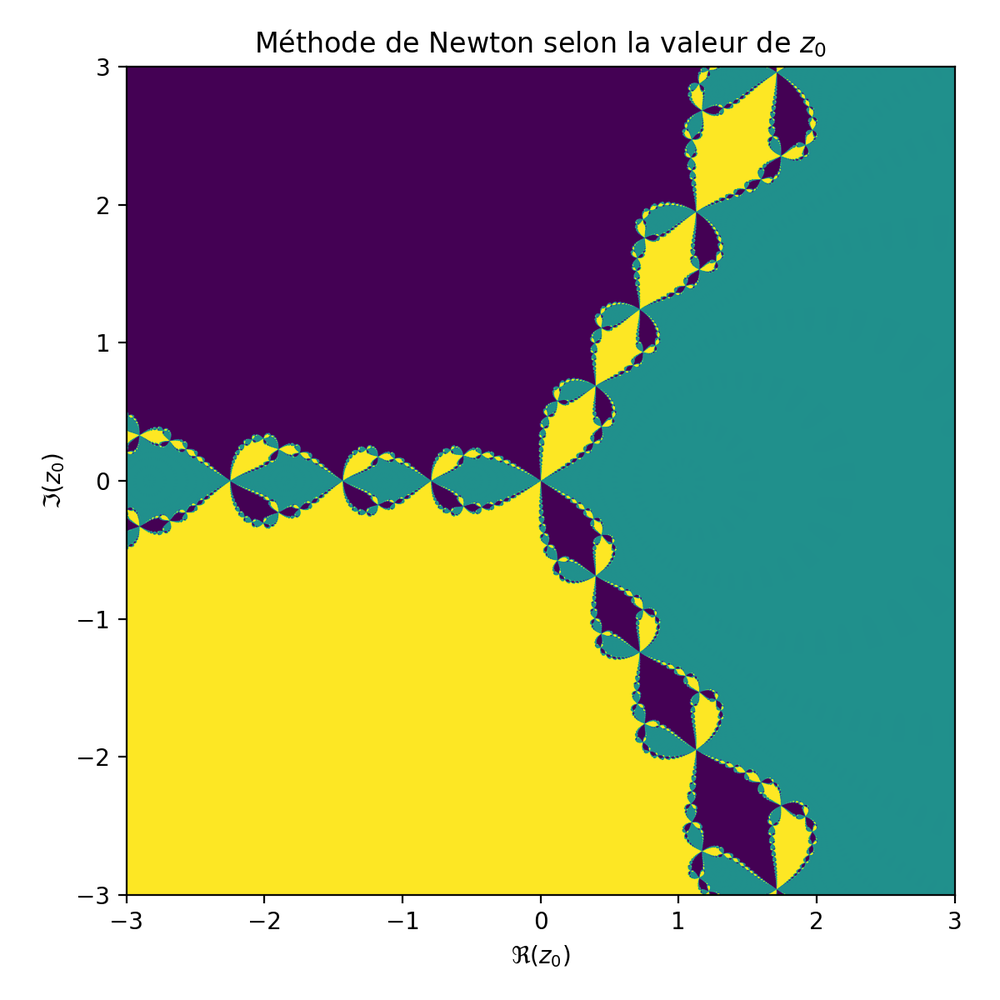</center>




**c)**
<font color="red">!</font> La méthode précédente a le désavantage de procéder séquentiellement au calcul pour chaque valeur de $z_0$, ce qui rend cette évaluation assez lente. Proposer une nouvelle implémentation permettant de calculer parallèlement toutes les valeurs de $z_0$ en utilisant les indexages Numpy.

**Indication.**
Pour encore plus de rapidité, les itérations de Newton de $F(z)=z^3-1$ peuvent être calculées à la main:

$$
z_{n+1} = \frac{1}{3z_n^2} + \frac{2z_n}{3} \,.
$$



<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

# Exercice 9.4: <font color="red">!!</font> Équation différentielle non linéaire

<div id="exer:newton-nonlinear"></div>

Le but est de résoudre l'équation différentielle suivante avec conditions de valeurs limites:

$$
\begin{align*}
u^{\prime\prime}(x)+u^{3}(x) & = \sin(x) \,, & u(0) & = u(2\pi) = 0 \,,
\end{align*}
$$

sur l'intervalle $[0,2\pi]$. Cette équation est un modèle simplifié pour une équation de Schrödinger non linéaire.

La méthode employée est celle des différences finies qui consistent à chercher les valeurs de $u$ aux points $x_n = \frac{2\pi n}{N}$ pour $n=0,1,\dots,N$. Les inconnues sont alors les nombres $u_n = u(x_n)$ et forment un vecteur de dimension $N+1$. La méthode des différences finies consiste à approximer la dérivée seconde par:

$$
u^{\prime\prime}(x) \approx \frac{u(x+h)-2u(x)+u(x-h)}{h^{2}} \,,
$$

lorsque $h$ est petit.
En prenant $h=\frac{2\pi}{N}$, alors:

$$
u^{\prime\prime}(x_n) \approx \frac{u_{n+1}-2u_n+u_{n-1}}{h^{2}} \,,
$$

et donc l'équation initiale s'approxime par:

$$
\begin{align*}
\frac{u_{n+1}-2u_{n}+u_{n-1}}{h^{2}}+u_{n}^{3} & = \sin(x_{n}) \,, & u_{0} & = u_{N} = 0 \,,
\end{align*}
$$

pour $n=1,2,\dots,N-1$.
Cette équation peut être vue comme une équation du type $F(\boldsymbol{u})=\boldsymbol{0}$ pour $\boldsymbol{u} = (u_n)_ {n=0}^{N+1}$ et donc être résolue par la méthode de Newton.

**a)**
Montrer l'approximation suivante:

$$
u^{\prime\prime}(x) = \frac{u(x+h)-2u(x)+u(x-h)}{h^{2}} + O(h^2) \quad \text{lorsque} \quad h \to 0 \,.
$$



**Indication.**
Utiliser le théorème de Taylor.





**b)**
Définir un vecteur `x` représentant les $N+1$ points équidistribués dans $[0,2\pi]$ et `h` la distance entre les points, avec par exemple $N=200$.




**c)**
Définir une fonction `F(u)` représentant la fonction $F:\mathbb{R}^{N+1} \to \mathbb{R}^{N+1}$ permettant de mettre l'équation approchée sous la forme $F(\boldsymbol{u})=\boldsymbol{0}$.

**Indication.**
Pour avoir une implémentation rapide, il est impératif pour construire $F$ d'utiliser non pas une boucle, mais le slicing Numpy.




**d)**
Définir une fonction `DF(u)` représentant la jacobienne de la fonction précédente.

**Indication.**
La jacobienne est la dérivée de $F(\boldsymbol{u})=F(u_0,u_1,\dots,u_{N})$ par rapport à $\boldsymbol{u} = (u_0,u_1,\dots,u_{N})$, c'est-à-dire:

$$
F^{\prime}(\boldsymbol{u})=\begin{pmatrix}\partial_{0}F(\boldsymbol{u}) & \partial_{1}F(\boldsymbol{u}) & \partial_{2}F(\boldsymbol{u}) & \cdots & \partial_{N-1}F(\boldsymbol{u}) & \partial_{N}F(\boldsymbol{u})\end{pmatrix}\,,
$$

et peut se calculer explicitement à la main.





**e)**
Utiliser la fonction `newton` définie précédemment pour calculer une solution approchée de l'équation. En changeant de valeurs initiales, est-il possible de trouver d'autres solutions ?

**Indication.**
Essayer avec la donnée initiale $u_0(x) = (1+k)\sin(kx)$ pour $k=1,2,3,4$ comme point de départ de la méthode de Newton.

